# load and process data

In [50]:


import requests

url = "http://deepyeti.ucsd.edu/jianmo/amazon/categoryFiles/Video_Games.json.gz"
filename = url.split("/")[-1]
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)

KeyboardInterrupt: 

In [1]:
import gzip
import json
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

In [2]:
data = parse("./Video_Games.json.gz")

In [3]:
import random
data = list(data)
random.seed(0)
random.shuffle(data)

In [4]:
traindata = data[:50000]
validdata = data[50000:75000]
testdata = data[75000:100000]

In [5]:
traindata[-1]

{'overall': 1.0,
 'verified': True,
 'reviewTime': '12 14, 2016',
 'reviewerID': 'A3VK4801K2E8MG',
 'asin': 'B000WMEEBC',
 'style': {'Platform:': ' PlayStation 3'},
 'reviewerName': 'King Zulu',
 'reviewText': 'Terrible, cannot compete with the PC version...',
 'summary': 'One Star',
 'unixReviewTime': 1481673600}

In [6]:
traindata[1].keys()

dict_keys(['overall', 'vote', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime'])

In [7]:
from collections import defaultdict
userset = set()
itemset = set()
averageRating = 0
ratingCount = defaultdict(int)
acc = 0
counter = 0


for d in traindata:
    userset.add(d['reviewerID'])
    itemset.add(d['asin'])
    acc += float(d['overall'])
    counter+=1
    ratingCount[d['overall']] += 1
averageRating = acc/counter

# basic analysis

In [8]:
print("Number of user: %d \nNumber of items: %d \naverageRating = %f"%(len(userset),len(itemset),averageRating)) 


Number of user: 48218 
Number of items: 16602 
averageRating = 4.034360


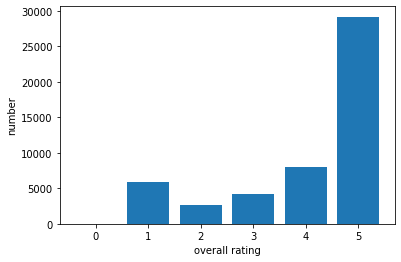

In [9]:
import matplotlib.pyplot as plt
x = range(6)
y = [ ratingCount[xx] for xx in x]
plt.bar(x,y)
plt.ylabel('number')
plt.xlabel('overall rating')
plt.show()

## avr rating is high

In [10]:
lenAndRating = []
noReviewCount = 0
noSumCount = 0
commonCount = 0
for index,d in enumerate(traindata) :

    if('reviewText' not in d.keys()):
        noReviewCount+=1
        continue
    if('summary' not in d.keys()):
        noSumCount+=1
        continue
    lenAndRating.append(        (     len(d['reviewText'].replace('\n','').replace('\'','')),  len(d['summary']),   d['overall']      )                )
    commonCount+=1


print("normal data:%d \ndata without reviewtext:%d\ndata without summary:%d"%(commonCount,noReviewCount,noSumCount))

    

normal data:49961 
data without reviewtext:30
data without summary:9


## Tiny part data are not complete, just use average to predict rating

In [11]:
lenAndRating.sort(key=lambda s:-s[0])

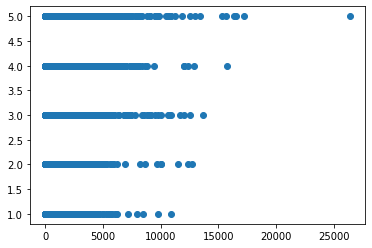

In [12]:
x = [i[0] for i in lenAndRating]
y = [i[2] for i in lenAndRating]

plt.scatter(x,y)
plt.show()

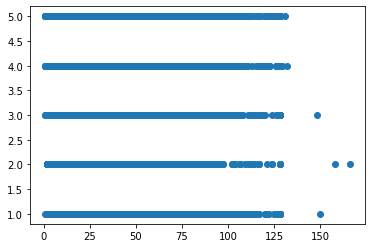

In [13]:
x = [i[1] for i in lenAndRating]
y = [i[2] for i in lenAndRating]

plt.scatter(x,y)
plt.show()

## length of the text and summary only give small info

In [32]:
from transformers import pipeline


In [35]:
senti = pipeline('sentiment-analysis',device=-1)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [45]:
sentiAndRating = []
for index,d in enumerate(traindata[:1000]) :
    # print('process : %s'%(str(index/len(traindata)*100)+'%'),end='\r')
    if('reviewText' not in d.keys()):
        continue
    if('summary' not in d.keys()):
        continue
    sentiAndRating.append(        (     senti(d['reviewText'].replace('\n','').replace('\'','')[:500]),   d['overall']      )                )
    # commonCount+=1


In [46]:
sentiAndRating

[([{'label': 'NEGATIVE', 'score': 0.9997990727424622}], 2.0),
 ([{'label': 'POSITIVE', 'score': 0.9555448889732361}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9997385144233704}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9998683929443359}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.999828577041626}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9998641014099121}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9998164772987366}], 4.0),
 ([{'label': 'POSITIVE', 'score': 0.9959980249404907}], 5.0),
 ([{'label': 'NEGATIVE', 'score': 0.9974330067634583}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9997811913490295}], 4.0),
 ([{'label': 'NEGATIVE', 'score': 0.758135199546814}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9973031282424927}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9998770952224731}], 5.0),
 ([{'label': 'NEGATIVE', 'score': 0.9899424314498901}], 4.0),
 ([{'label': 'POSITIVE', 'score': 0.9998613595962524}], 5.0),
 ([{'label': 'NEGATIVE', 'score': 0.9949064254760742}], 2.0),
 ([{'label

## seems highly related to the sentiment of the review text

In [47]:
sentiAndRating = []
for index,d in enumerate(traindata[:1000]) :
    # print('process : %s'%(str(index/len(traindata)*100)+'%'),end='\r')
    if('reviewText' not in d.keys()):
        continue
    if('summary' not in d.keys()):
        continue
    sentiAndRating.append(        (     senti(d['summary'].replace('\n','').replace('\'','')[:500]),   d['overall']      )                )
    # commonCount+=1


In [48]:
sentiAndRating

[([{'label': 'NEGATIVE', 'score': 0.9997203946113586}], 2.0),
 ([{'label': 'POSITIVE', 'score': 0.9998500347137451}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9996330738067627}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9990069270133972}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9998682737350464}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9990069270133972}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.997866690158844}], 4.0),
 ([{'label': 'POSITIVE', 'score': 0.9543790221214294}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9998681545257568}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9998236298561096}], 4.0),
 ([{'label': 'POSITIVE', 'score': 0.9980775117874146}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9998300075531006}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9925048351287842}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9901217818260193}], 4.0),
 ([{'label': 'POSITIVE', 'score': 0.9977005124092102}], 5.0),
 ([{'label': 'POSITIVE', 'score': 0.9622600674629211}], 2.0),
 ([{'labe

## summary's sentiment works worse than origin text's

## to do: normalize the score, use it  as a feature, to train a regression model